# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


No módulo 17, vocês realizaram a primeira etapa do projeto de crédito de vocês. Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste. Já no módulo 14, aplicaram a base já tratada o algoritmo de Naive Bayes, onde avaliaram os resultados das previsões. Nesse módulo aplicaremos a nossa base o algoritmo da árvore de decisão.

In [38]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from numpy.f2py.crackfortran import get_parameters
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import plotly.graph_objs as go

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [11]:
os.chdir('C:/Users/yurid/Downloads')
x_train = pd.read_csv('xtrain.csv', delimiter=',')
y_train = pd.read_csv('ytrain.csv', delimiter=',')
x_test = pd.read_csv('x_test.csv', delimiter=',')
y_test = pd.read_csv('y_test.csv', delimiter=',')

tam_x_train = x_train.shape
tam_y_train = y_train.shape
tam_x_test = x_test.shape
tam_y_test = y_test.shape
bal_y_train = y_train.value_counts()

print('Tamanho de xtrain:', tam_x_train)
print('Tamanho de ytrain:', tam_y_train)
print('Tamanho de xtest:', tam_x_test)
print('Tamanho de ytest:', tam_y_test)
print('Balanceamento de ytrain:', bal_y_train)

Tamanho de xtrain: (252, 7)
Tamanho de ytrain: (252, 1)
Tamanho de xtest: (41, 7)
Tamanho de ytest: (41, 1)
Balanceamento de ytrain: Credit Score
0               84
1               84
2               84
Name: count, dtype: int64


# 2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.

1- Verificar se os conjuntos de treino e teste estão corretos, com a coluna alvo (y) devidamente separada e balanceada;

2- Definir se é um problema de regressão ou classificação. No caso do exercício, temos um problema de classificação em Alto, Médio ou Baixo score de crédito;

3- Aplicar o algoritmo com scikit.learn. Aqui, é importante lembrar de introduzir o parâmetro random_state para garantir reprodutibilidade do modelo;

4- Fazer as previsões para a base de teste;

5- Calcular os parâmetros de avaliação com a função classification_report e avaliá-los conforme a aula;

6- Plotar a árvore e definir como será a poda a partir da importância das features;

7- Refazer o modelo e comparar os resultados.

Vale ressaltar que, após a avaliação dos resultados, é possível melhorar o modelo alterando os parâmetros da função, como a profundidade máxima, o número limite de folhas ou features, o parâmetro de poda, o número mínimo de amostras para dividir um nó interno, entre outros.

# 3) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modedlo com os dados de treino.

In [20]:
dec_tree = DecisionTreeClassifier(criterion='gini', random_state=0)
dec_tree.fit(x_train, y_train)
previsoes_treino = dec_tree.predict(x_train)
accuracy = accuracy_score(y_train, previsoes_treino)
print('Acurácia com os dados de treino: ', accuracy)

Acurácia:  1.0


# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [23]:
previsoes_test = dec_tree.predict(x_test)
accuracy_test = accuracy_score(y_test, previsoes_test)
avaliacao = classification_report(y_test, previsoes_test)
print('Acurácia com os dados de teste: ', accuracy_test)
print(avaliacao)

Acurácia com os dados de teste:  0.975609756097561
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.97      0.98        29
           2       1.00      1.00      1.00         6

    accuracy                           0.98        41
   macro avg       0.95      0.99      0.97        41
weighted avg       0.98      0.98      0.98        41



- **Precisão:** Para a classe 0, temos uma precisão de 0.86, que significa que 86% das amostras previstas como pertencentes a esta classe são verdadeiramente desta classe. Já para as classes 1 e 2, temos precisão de 1, o que indica que 100% das previsões foram corretas nesses casos.

- **Recall:** No que tange ao recall, temos o valor 1 para as classes 0 e 2, de modo que o modelo identificou corretamente 100% das amostras desta classe. Por sua vez, na classe 1 temos o valor 0.97, que denota que o modelo identificou corretamente 97% das classes.

- **F1-Score:** Conforme os dados acima, destacamos o f1-score. Para a classe 0, temos 0.92, o valor mais baixo registrado, seguido por 0.98 da classe 1 e 1.00 da classe 2. Com o aumento do f1-score, temos que precisão e recall são mais próximos do ideal. Todavia, os valores altos das 3 classes denotam medidas ideais.

- **Acurácia:** No caso da acurácia global do modelo, temos o valor de 0.98, que, ainda que seja menor que o da base de treino (1), é um valor altíssimo, de forma que 98% das previsões do modelo estão corretas.


In [43]:
conf_matrix = confusion_matrix(y_test, previsoes_test)
fig = go.Figure()
fig.add_traces(go.Heatmap(z=conf_matrix,
                          y = ['Médio', 'Alto', 'Baixo'],
                          x = ['Médio', 'Alto', 'Baixo'],
                          texttemplate='%{z}',
                          colorscale = 'Blues'))
fig.update_layout(title_text = 'Matriz de Confusão do Conjunto Teste')

A matriz de confusão acime reforça o que foi dito sobre a precisão: 100% dos valores 1 e 2 (Alto e Baixo) foram preditos corretamente, enquanto 86% dos valores 0 (Médio) foram acertados.

# 5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

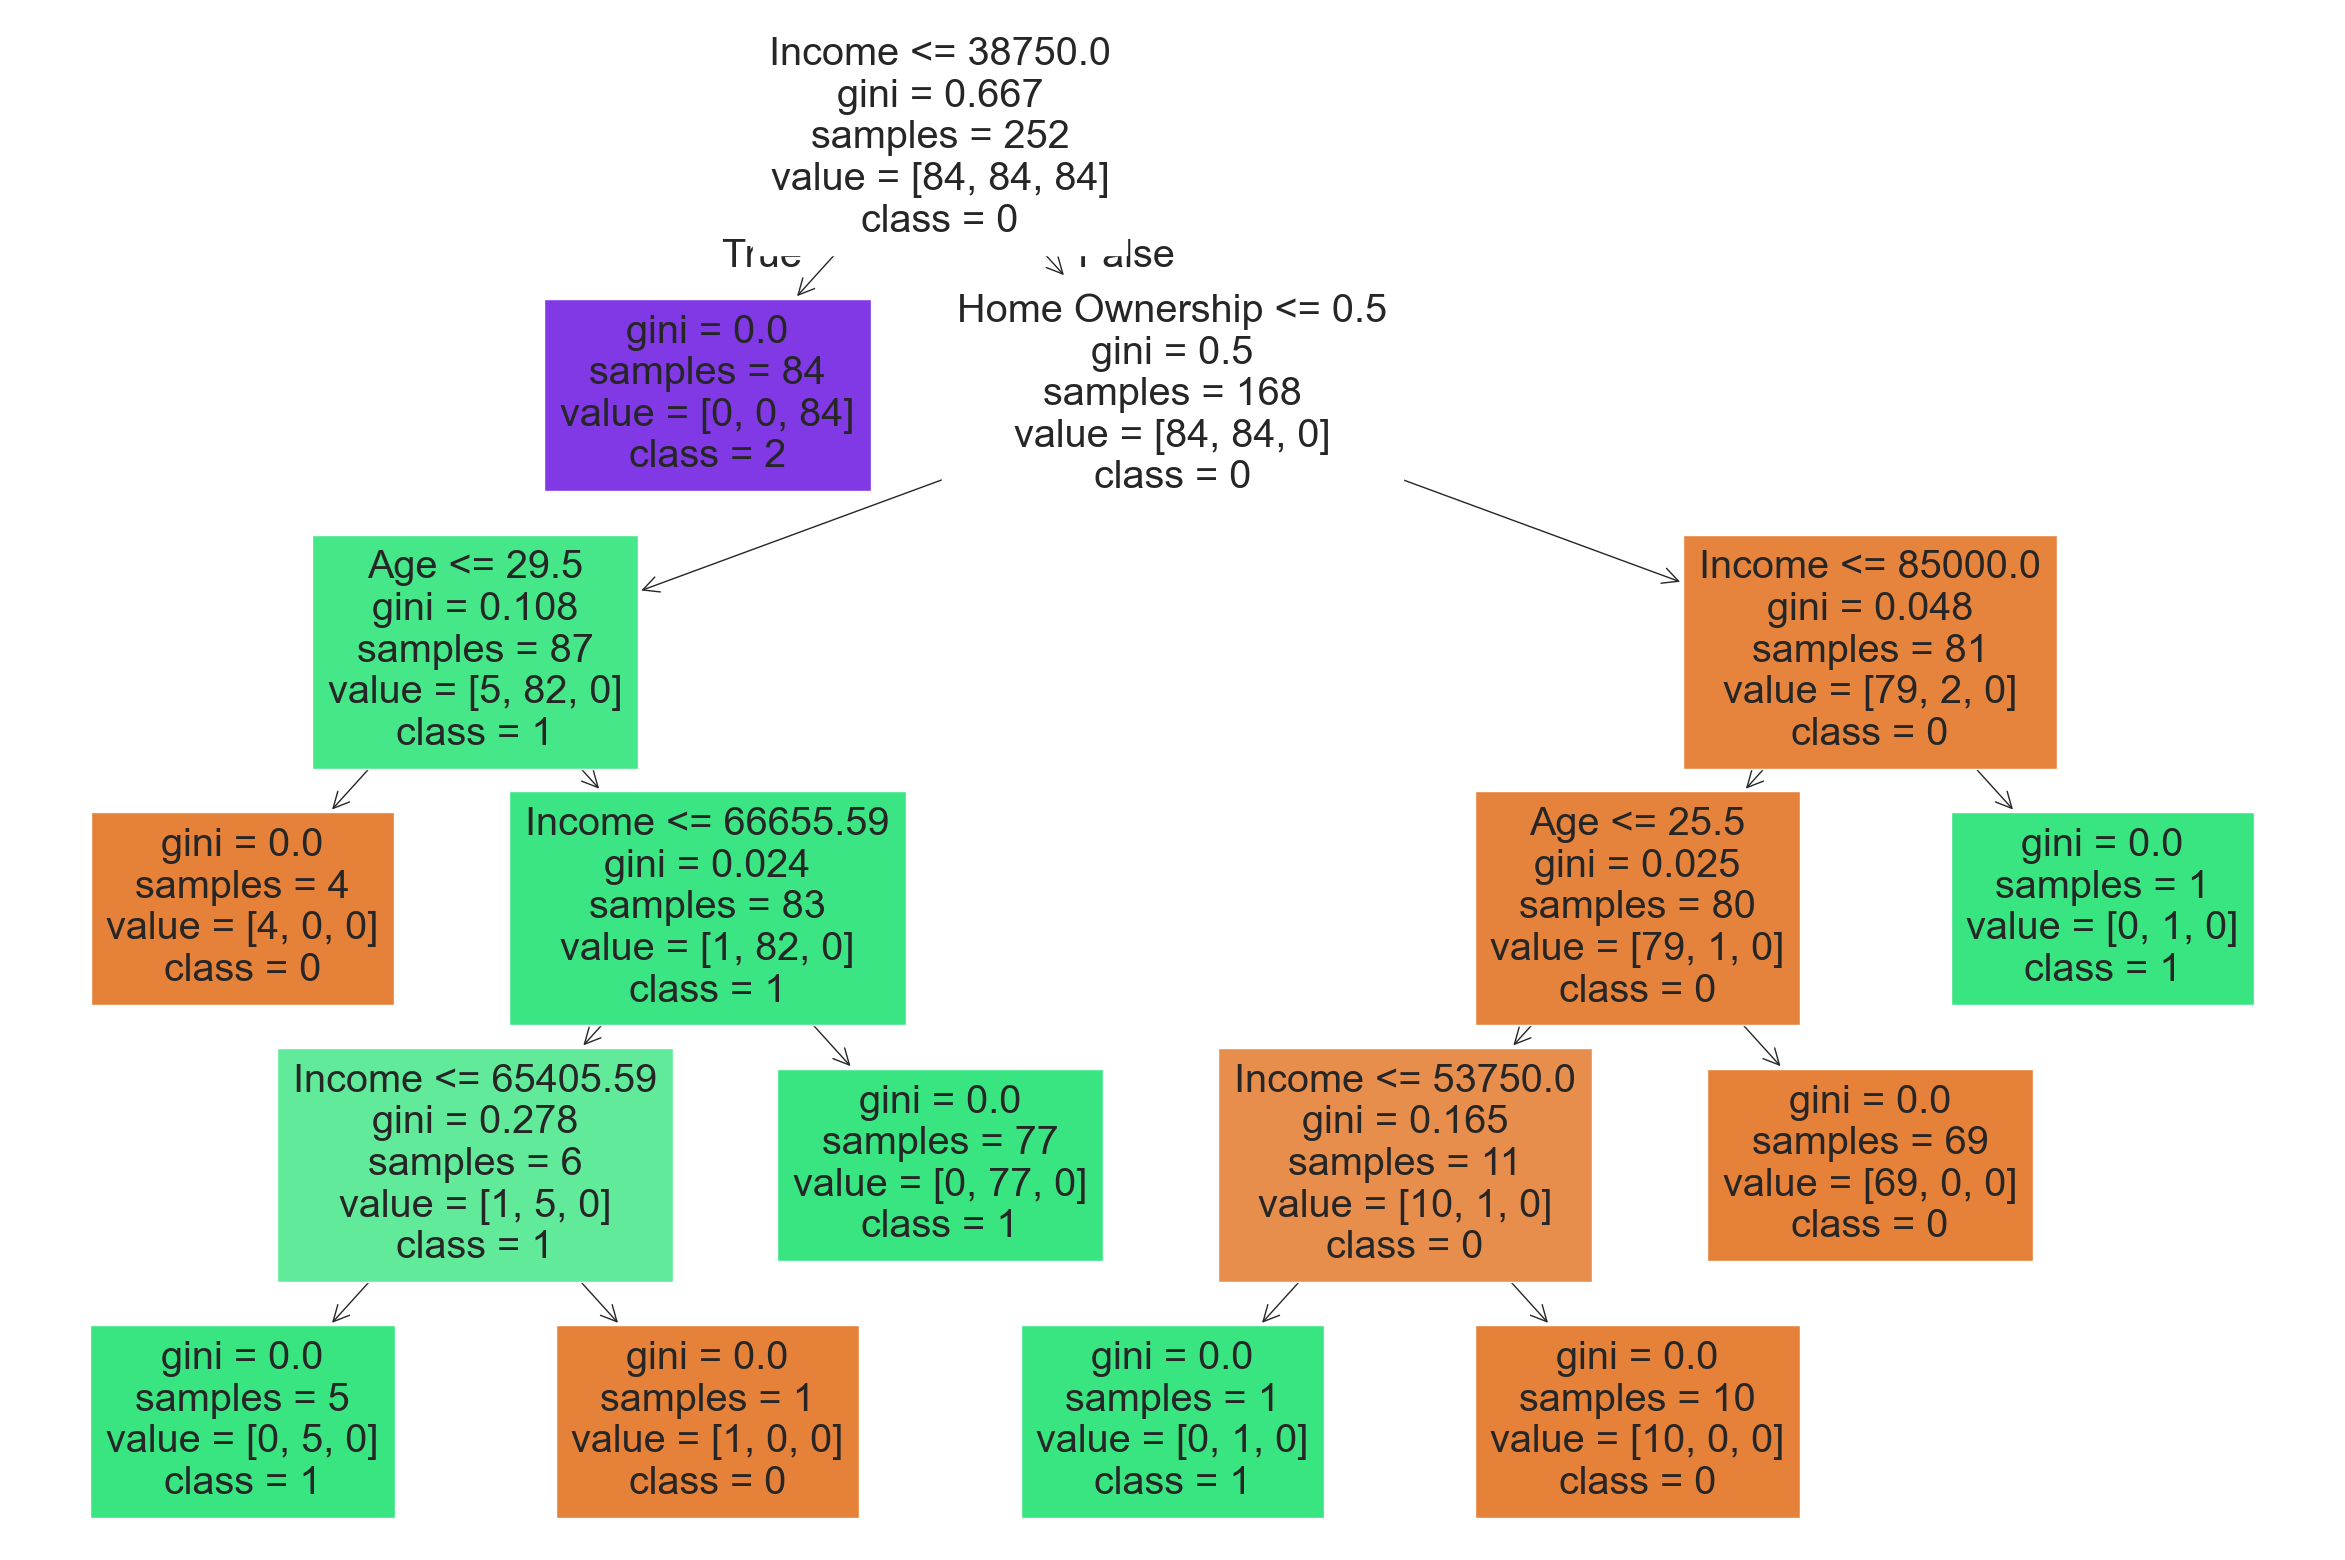

A profundidade da árvore é:  5


In [44]:
plt.figure(figsize=(30,20))
plot_tree(dec_tree, feature_names=x_train.columns, filled=True, class_names=['0', '1', '2'])
plt.show()
tree_depth = dec_tree.tree_.max_depth
print('A profundidade da árvore é: ', tree_depth)

Visualmente temos que o primeiro divisor de águas é a renda, que gera dois nós. O primeiro, que agrupa indivíduos com renda inferior a 38750, é um nó puro em virtude de seu índice Gini = 0, de forma que todas os indivíduos são classificados em 2 (Baixo). A partir de então, a árvore se preocupa em identificar se os indivíduos de renda acima do limite estipulado são da classe 1 (Alto) ou 0 (Médio), de forma a ramificar até chegar a mais nós puros. Vale destacar que as cores indicam as classes (roxa para 2, verde para 1 e marrom para 0) e a intensidade denota o valor de gini, quanto mais forte a cor, maior o índice. Por fim, vale o alerta: já que todos os nós foram puros, é possível que tenha acontecido overfitting do modelo.

# 6) Identifique as 2 principais features do modelo.


In [47]:
importance = dec_tree.feature_importances_
features = x_train.columns

fig = go.Figure()

fig.add_traces(go.Bar(x=importance,
                      y=features,
                      marker_color='tomato',
                      orientation='h'))

fig.update_layout(title_text = 'Importância das features',
                  xaxis_title = 'Grau de Importância',
                  yaxis_title = 'Features')


Temos, então, que as duas principais features do modelo são as variáveis 'Income' e 'Home Ownership'.

# 7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.

In [61]:
x_train_red = x_train[['Income', 'Home Ownership']]
x_test_red = x_test[['Income', 'Home Ownership']]
dec_tree_red = DecisionTreeClassifier(criterion='gini', random_state=0)
dec_tree_red.fit(x_train_red, y_train)
previsoes_red = dec_tree_red.predict(x_test_red)

relatorio = classification_report(y_test, previsoes_red)
print('Relatório de Avaliação: ')
print(relatorio)

Relatório de Avaliação: 
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.97      0.97      0.97        29
           2       1.00      1.00      1.00         6

    accuracy                           0.95        41
   macro avg       0.93      0.93      0.93        41
weighted avg       0.95      0.95      0.95        41



Aqui, temos valores menores para todas as métricas nas classes 0 e 1 (alto e médio), de forma que o desempenho do modelo pode ser considerado inferior ao modelo anterior. Além disso, a acurácia tem valor inferior. Para validar, construiremos a matriz de confusão e plotaremos a árvore.

In [62]:
conf_matrix = confusion_matrix(y_test, previsoes_red)
fig = go.Figure()
fig.add_traces(go.Heatmap(z=conf_matrix,
                          y = ['Médio', 'Alto', 'Baixo'],
                          x = ['Médio', 'Alto', 'Baixo'],
                          texttemplate='%{z}',
                          colorscale = 'Blues'))
fig.update_layout(title_text = 'Matriz de Confusão do Conjunto Reduzido')

Aqui, podemos ver que os erros ocorreram em Médio e Alto, diferente do exemplo anterior, que só errou no médio. Todavia, por ser um conjunto pequeno e possuir valores altos, o modelo ainda é promissor.

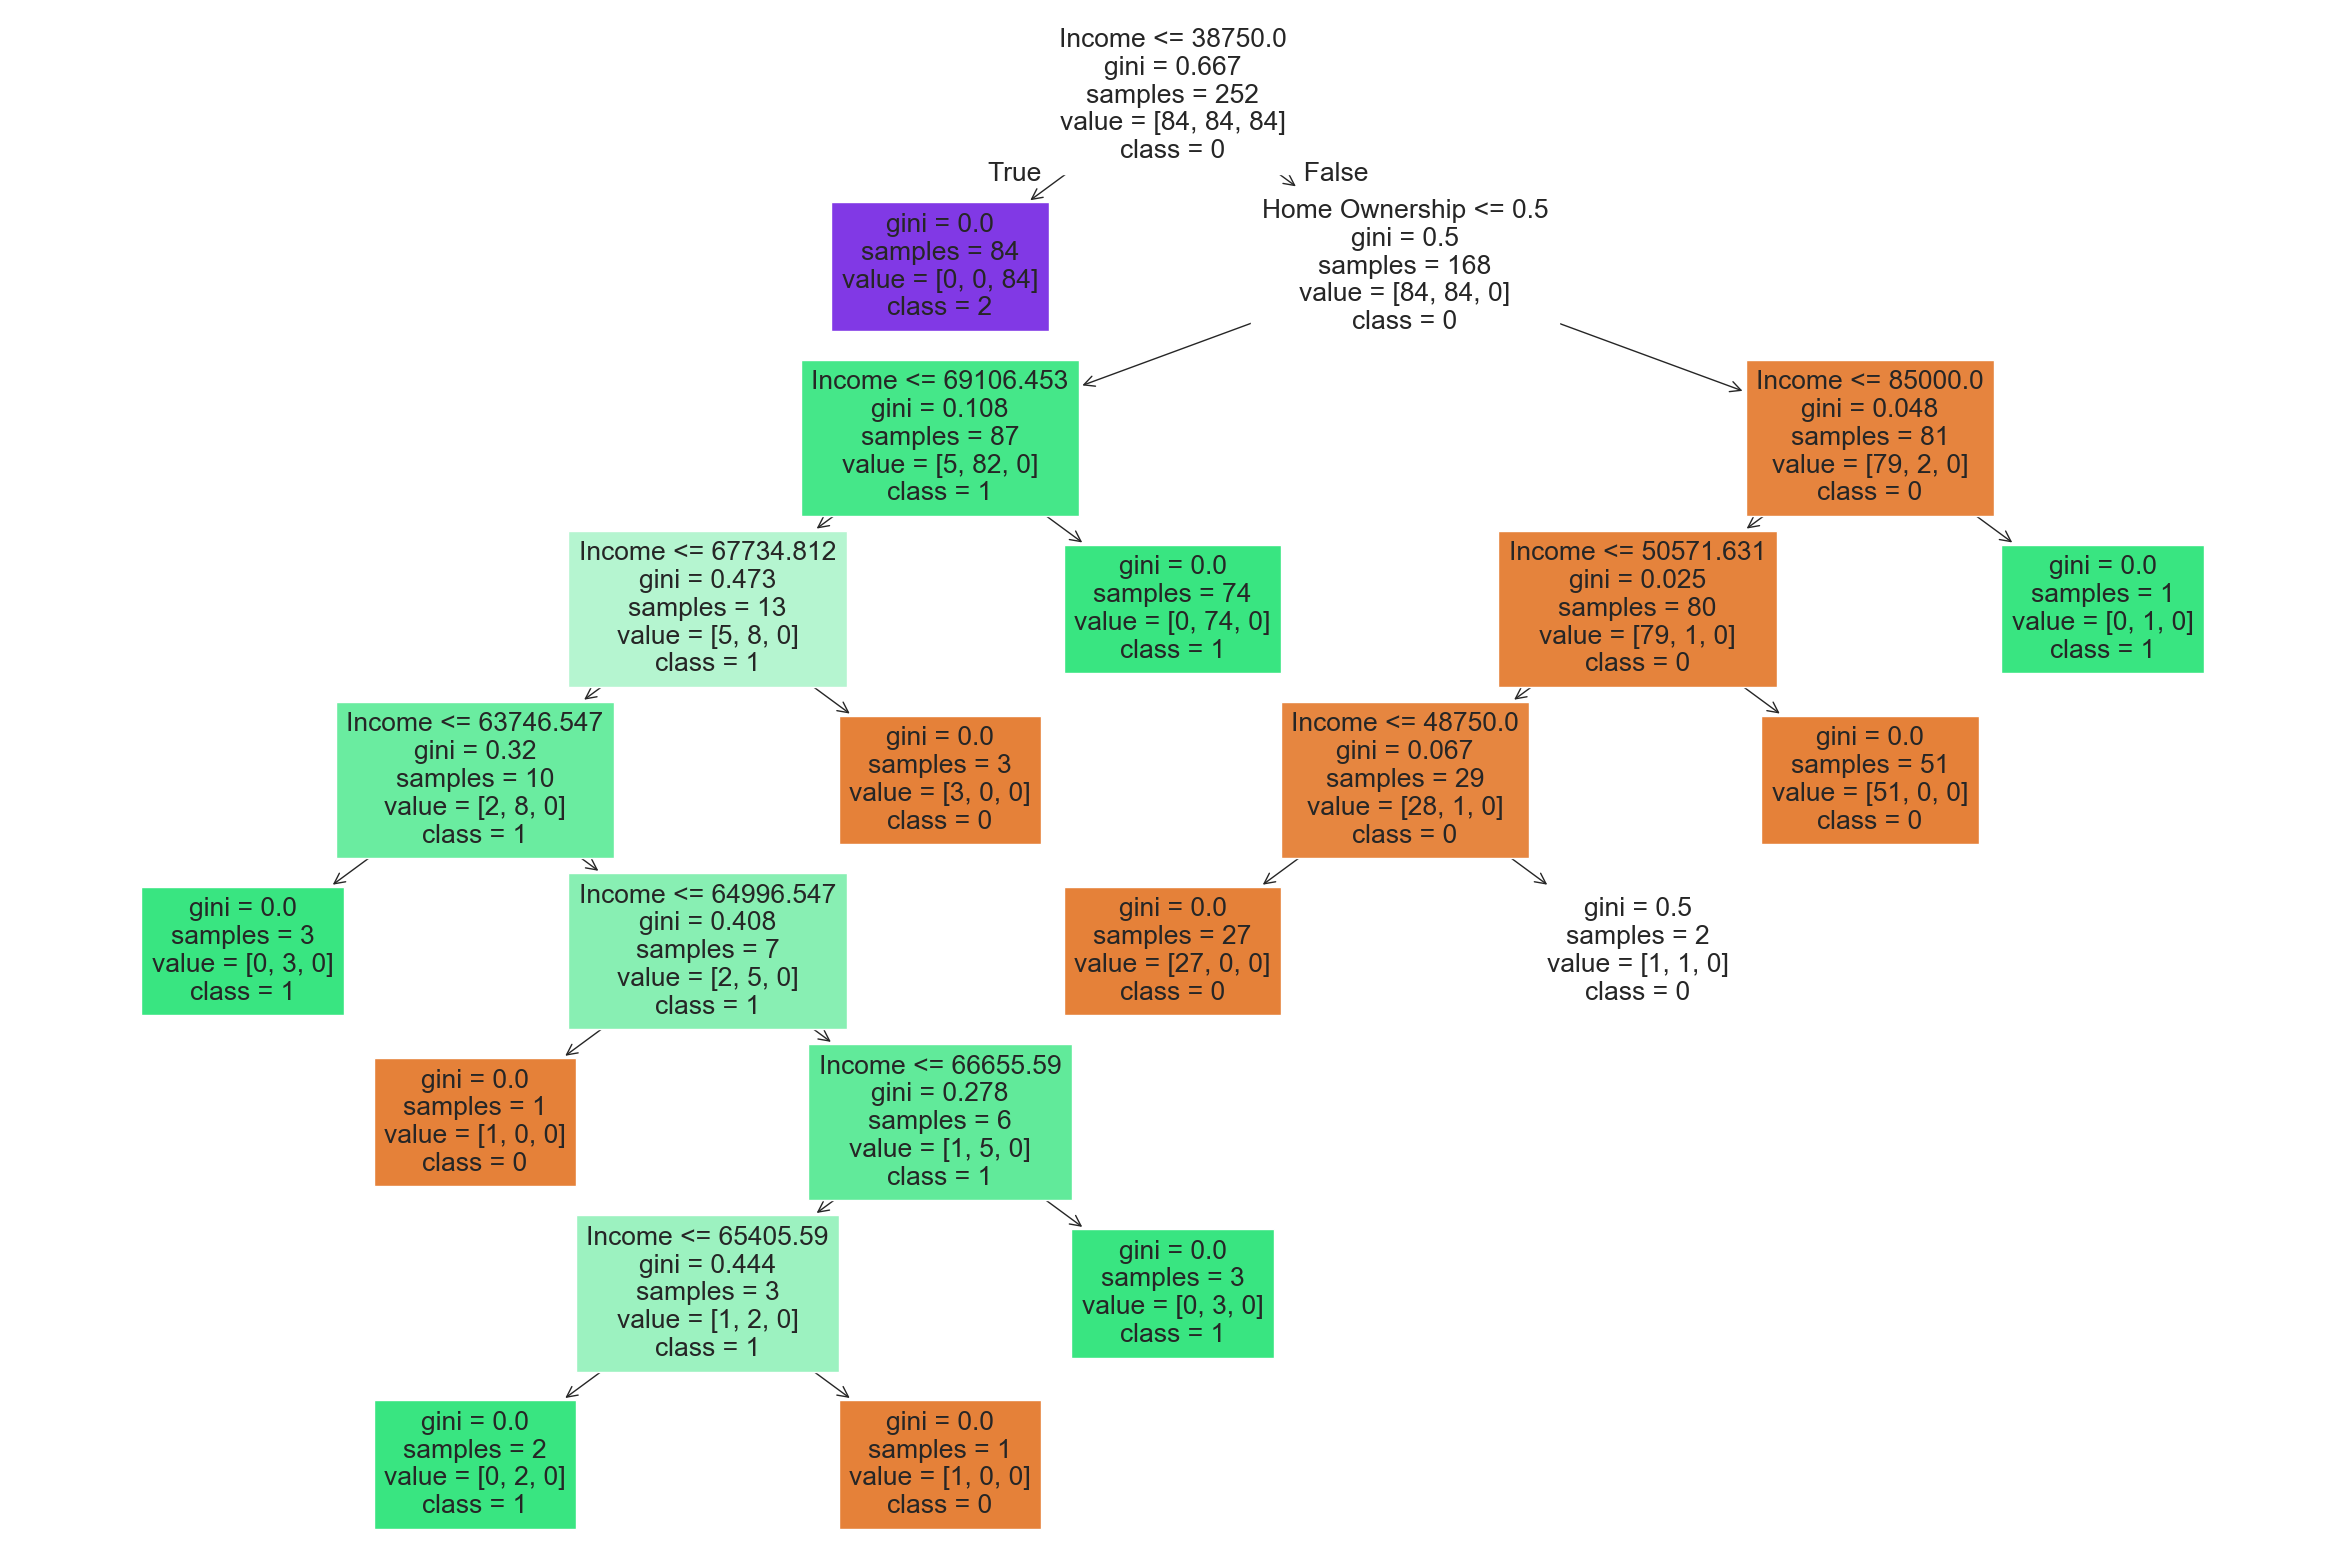

A profundidade da árvore é:  8


In [63]:
plt.figure(figsize=(30,20))
plot_tree(dec_tree_red, feature_names=x_train_red.columns, filled=True, class_names=['0', '1', '2'])
plt.show()
tree_depth = dec_tree_red.tree_.max_depth
print('A profundidade da árvore é: ', tree_depth)

Aqui, vemos uma árvore mais profunda e com mais ramos, o que a torna mais superajustada aos dados que a anterior.


# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.

Comparando os parâmetros analisados em ambos os modelos, temos que acurácia e recall foram maiores no caso da árvore de decisão, de forma que os dados foram melhor analisados e avaliados por este modelo.